In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")


[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, cowplot, ggdist)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/functions/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/functions/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/functions/Misc_functions.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/functions/Plotting_functions.R")

In [4]:
baseraincloud_plot.fx <- function(mydf, yvar, xvar, fillvar, colpal, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2, adjustslab= 0.5, binwidth. = unit(0.01, "npc") ) {
    p0 <- ggplot(data = mydf, aes(x = eval(parse(text = xvar)), y = eval(parse(text = yvar)), fill = eval(parse(text = fillvar))))  +
    geom_dots(side = "left", scale = scaledots, justification = justdots, color = "transparent", overlaps = "nudge", binwidth = binwidth.) +
        stat_slab(scale = scaleslab, adjust = adjustslab, justification = justslab) +
        geom_boxplot(width = 0.2, outlier.shape = NA, alpha = 0.5) +
        scale_fill_manual(values = colpal) +
        myaxis +
        myplot +
        theme(legend.position = "none") + scale_y_continuous(limits = c(0, 110), breaks = c(0, 25, 50, 75, 100)) +
        labs(x = "", y = gsub("`", "", yvar))
    return(p0)
}


# Paths

In [6]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [8]:
# h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [7]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [8]:
table(meta_div$Patient[meta_div$Disease_type == "NB"])


CHP_346 CHP_379 CHP_385 CHP_418 
      1       1      10       7 

In [9]:
meta_div <- meta_div[ !is.na(meta_div$CD3), ]

Exclude T-ALLs

In [10]:
meta_div <- meta_div[ meta_div$cancergroup != "T-cell malignancies", ]

In [11]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]

In [12]:
length(unique(pbmc$Patient))

[1] 79

In [13]:
dim(pbmc)

[1] 225  68

In [14]:
pbmc <- pbmc[ pbmc$CD3 > 0,]

## Rainclouds across groups

In [15]:
pbmc_01 <- pbmc[pbmc$cycle == "X01",]

In [16]:
pbmc_01[ pbmc_01$Disease_type == "OS", c("PD1%", "CM%","Naïve%","TE%","SCM%","EM%", "sample_id")]

,PD1%,CM%,Naïve%,TE%,SCM%,EM%,sample_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
443,5.422222,24.4444444,26.31111,38.044444,8.7111111,2.4888889,CHP_348_01
513,8.075532,37.7259944,22.61953,34.471675,0.5624749,4.6203294,CHP_362_01
523,12.567399,7.4243053,47.61510,42.845292,0.7465782,1.3687267,CHP_364_01
746,12.803738,15.6074766,39.34579,21.635514,7.6168224,15.7943925,CHP_408_01
353,4.636849,2.6672138,12.92573,75.748872,7.6733689,0.9848174,CHP_330_01
653,47.666254,0.6195787,37.33994,6.691450,55.1425031,0.2065262,CHP_390_01
668,19.665072,22.0574163,47.94258,9.904306,17.9425837,2.1531100,CHP_393_01
866,15.575304,14.8737138,45.50982,33.582788,5.3320861,0.7015903,CHP_432_01
458,35.515955,36.3447990,29.96270,14.214671,2.3622047,17.1156237,CHP_351_01


Summary for PD1% by cancergroup:



$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.6279  1.6827  4.2012  6.7877  8.8470 21.8750       2 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.444  17.924  28.842  28.321  29.909  75.000 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7637  5.1478  9.4226 11.6555 13.4189 47.6662 



KS test results for PD1%:

  Leukemia vs Lymphoma: p = 2.4e-04

  Leukemia vs Solid tumors: p = 0.01

  Lymphoma vs Solid tumors: p = 0.004



Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”
Warning message:
“The provided binwidth will cause dots to overflow the boundaries of the
geometry.
→ Set `binwidth = NA` to automatically determine a binwidth that ensures dots
  fit within the bounds,
→ OR set `overflow = "compress"` to automatically reduce the spacing between
  dots to ensure the dots fit within the bounds,
→ OR set `overflow = "keep"` to allow dots to overflow the bounds of the
  geometry without producing a warning.
ℹ For more information, see the documentation of the `binwidth` and `overflow`
  arguments of `?ggdist::geom_dots()` or t

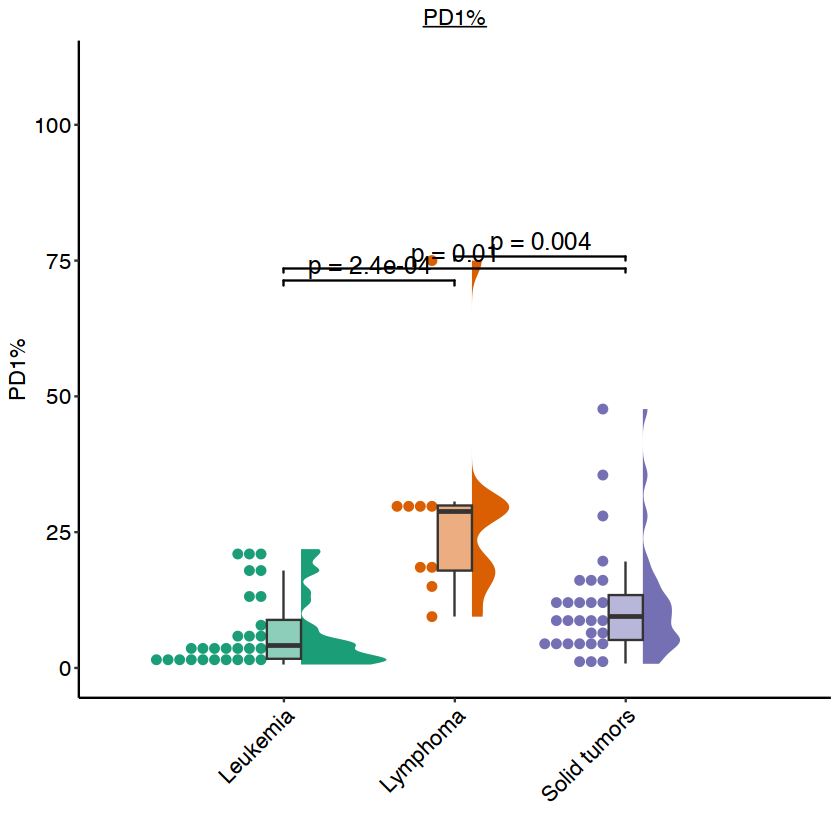

In [20]:
generate_raincloud_with_ks(
  pbmc_01,
  y_col = "PD1%",
  x_col = "cancergroup",
  fill_col = "cancergroup",
  colpal = group_col,
  scaledots = 0.5,
  justdots = 1.2,
  scaleslab = 0.5,
  justslab = -0.2,
  adjustslab = 0.5,
  binwidth. = 2,
  pairs = NULL,
  y_positions = NULL,
  title_label = NULL,
  textsize = 5,
  tip_length = 0.01
)

Naive

In [23]:
dim(pbmc_01)

[1] 67 68

In [24]:
p0 <- baseraincloud_plot.fx(pbmc_01, "`Naïve%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = 2 )  
#0.5,1.2,0.5,-0.2,0.5, NA) 

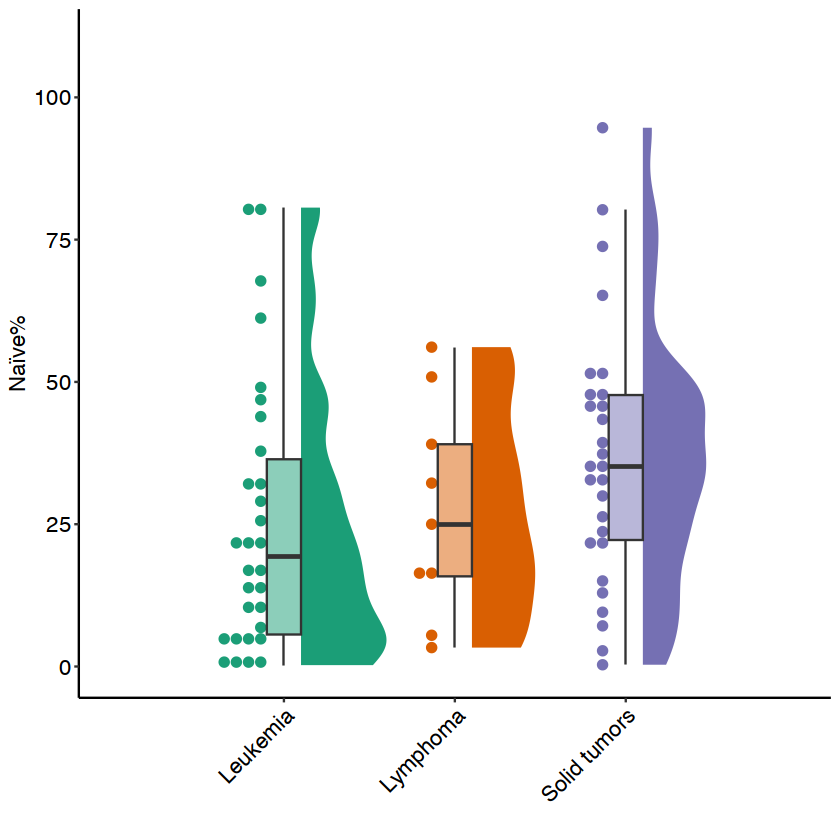

In [25]:
p0

In [26]:
tapply(pbmc_01$`Naïve%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2445  5.6227 19.2688 25.4286 36.4122 80.6271 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.322  15.839  25.000  27.209  39.053  56.111 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3055 22.2278 35.1714 36.8143 47.6970 94.6625 


In [27]:
mytest <- "Naïve%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value


	Exact two-sample Kolmogorov-Smirnov test

data:  pbmc_01[[mytest]][which(pbmc_01$cancergroup == "Solid tumors")] and pbmc_01[[mytest]][which(pbmc_01$cancergroup == "Leukemia")]
D = 0.35, p-value = 0.04152
alternative hypothesis: two-sided


[1] 0.04151808

[1] 0.7414816

[1] 0.8547524

In [28]:
mypval <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [29]:
mypval <- round_and_format(mypval)

In [30]:
mypval

[1] "0.04"

In [31]:
p0_stat <- p0 + geom_signif(
    y_position = 100, xmin = 1, xmax = 3,
    annotation = paste0("p = ",mypval), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("Naïve%") ))

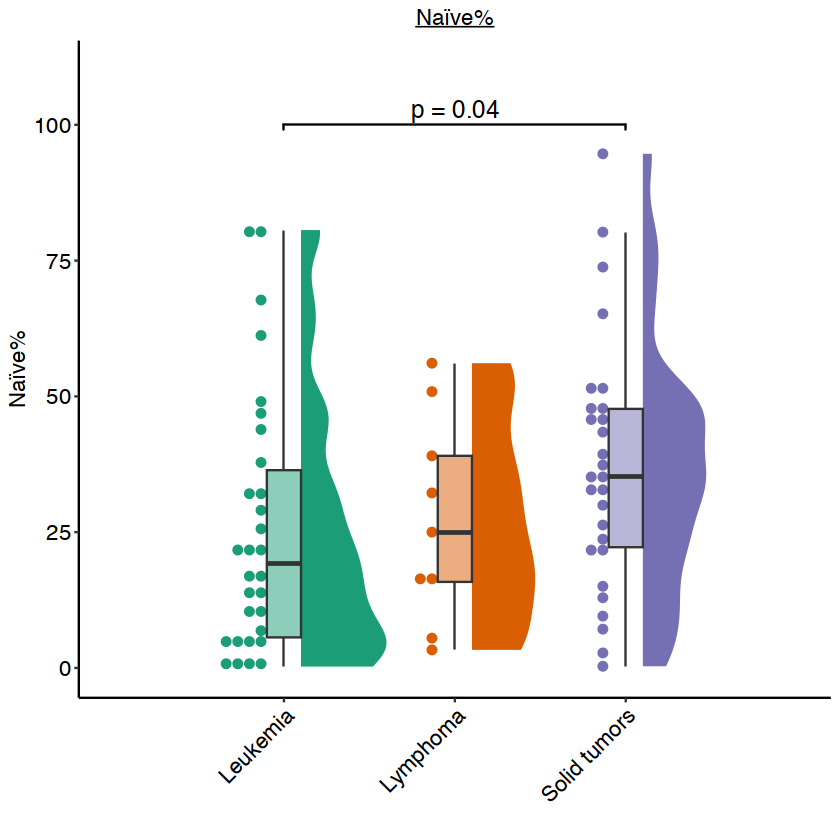

In [32]:
p0_stat

In [33]:
# pdf(paste0(plotpath, "rainclouds_Naive_X01.pdf"), width = 4, height = 6)
# p0_stat
# dev.off()

CM

In [34]:
p1 <- baseraincloud_plot.fx(pbmc_01, "`CM%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = 2 )  

Warning message:
“The provided binwidth will cause dots to overflow the boundaries of the
geometry.
→ Set `binwidth = NA` to automatically determine a binwidth that ensures dots
  fit within the bounds,
→ OR set `overflow = "compress"` to automatically reduce the spacing between
  dots to ensure the dots fit within the bounds,
→ OR set `overflow = "keep"` to allow dots to overflow the bounds of the
  geometry without producing a warning.
ℹ For more information, see the documentation of the `binwidth` and `overflow`
  arguments of `?ggdist::geom_dots()` or the section on constraining dot sizes
  in vignette("dotsinterval") (`vignette(ggdist::dotsinterval)`).”


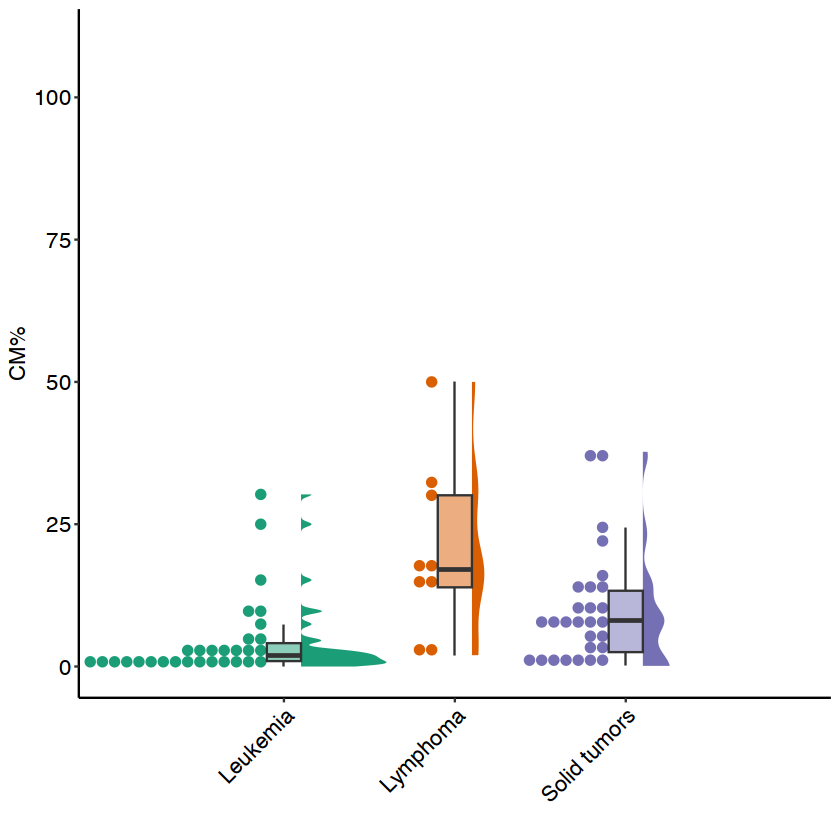

In [35]:
p1

In [36]:
mytest <- "CM%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

[1] 0.001632425

[1] 0.001386999

[1] 0.01689742

In [37]:
mypval1 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
mypval2 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
mypval3 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

In [38]:
mypval1
mypval2
mypval3

[1] 0.001632425

[1] 0.001386999

[1] 0.01689742

In [39]:
tapply(pbmc_01$`CM%`, pbmc_01$Disease_type, summary, na.rm = T)

$ALL
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1667  0.9390  2.1885  4.1486  3.0363 25.0000 

$AML
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9809  1.5116  2.2666  4.4701  4.2052 15.1954 

$ARMS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.18   11.18   11.18   11.18   11.18   11.18 

$BL
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.85   24.10   32.35   32.73   41.17   50.00 

$CML
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.303   9.287  16.271  16.271  23.254  30.238 

$DLBCL
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.983   6.070  10.158  10.158  14.246  18.333 

$ERMS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.105   6.409   8.015   7.977   9.583  13.772 

$EWS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4804  4.7722  5.4561  5.4881  8.3053  8.4263 

$HB
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.41    4.41    4.41    4.41    4.41    4.41 

$HD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.08  

In [40]:
tapply(pbmc_01$`CM%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.9495  1.9064  4.5730  4.1042 30.2376 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.983  13.910  17.084  20.387  30.082  50.000 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1142  2.5267  8.0147  9.9715 13.3115 37.7260 


In [41]:
mypval1 <- round_and_format(mypval1)
mypval2 <- round_and_format(mypval2)
mypval3 <- round_and_format(mypval3)

In [42]:
p1_stat <- p1 + geom_signif(
    y_position = c(75, 100, 85), xmin = c(1,1,2), xmax = c(2,3,3),
    annotation = c(paste0("p = ",mypval2), paste0("p = ",mypval1), paste0("p = ", mypval3)), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("CM%") ))

Warning message:
“The provided binwidth will cause dots to overflow the boundaries of the
geometry.
→ Set `binwidth = NA` to automatically determine a binwidth that ensures dots
  fit within the bounds,
→ OR set `overflow = "compress"` to automatically reduce the spacing between
  dots to ensure the dots fit within the bounds,
→ OR set `overflow = "keep"` to allow dots to overflow the bounds of the
  geometry without producing a warning.
ℹ For more information, see the documentation of the `binwidth` and `overflow`
  arguments of `?ggdist::geom_dots()` or the section on constraining dot sizes
  in vignette("dotsinterval") (`vignette(ggdist::dotsinterval)`).”


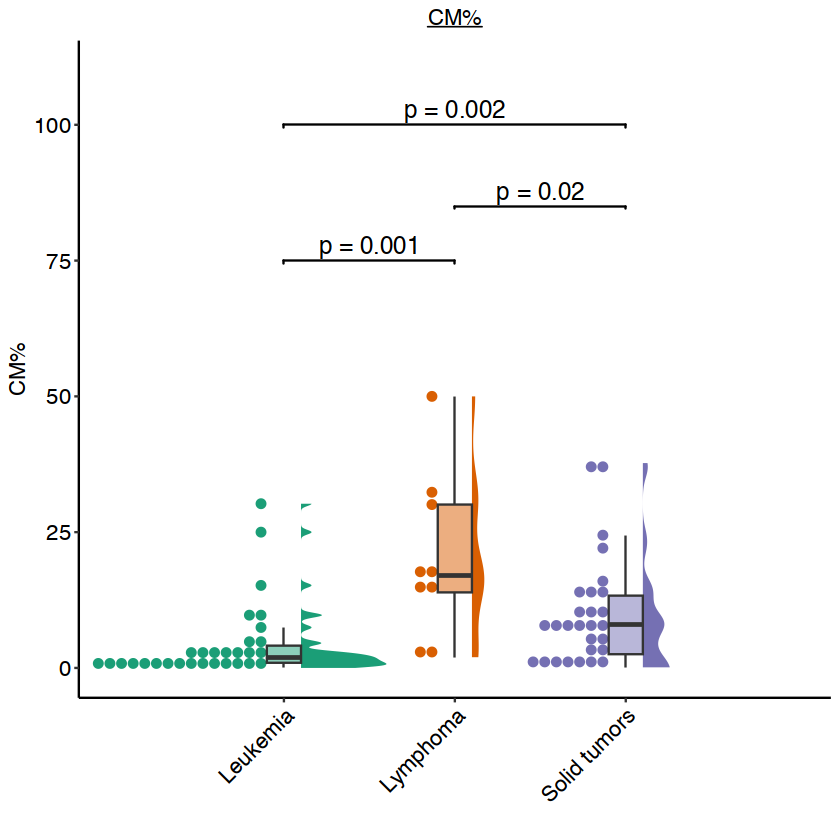

In [43]:
p1_stat

TE

In [44]:
p2 <- baseraincloud_plot.fx(pbmc_01, "`TE%`", "cancergroup", "cancergroup", group_col, 
# scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = NA)  
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = 2 )  

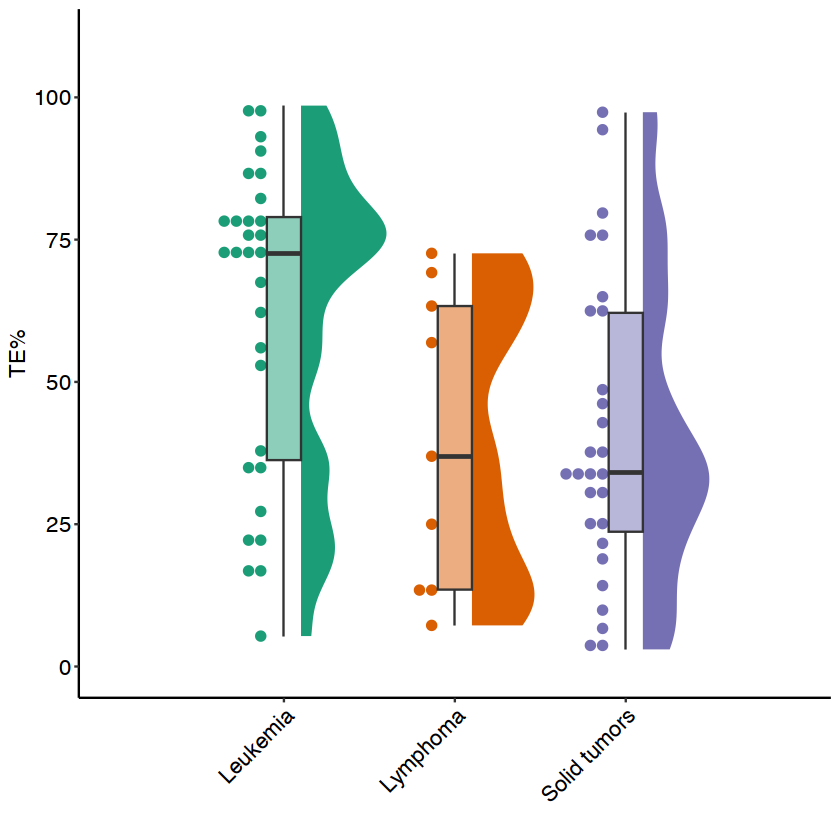

In [45]:
p2

In [46]:
mytest <- "TE%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

[1] 0.007136593

[1] 0.04304812

[1] 0.9231924

In [47]:
mypval3 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [48]:
mypval3 <- round_and_format(mypval3)

In [49]:
tapply(pbmc_01$`TE%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.343  36.264  72.522  61.578  78.966  98.550 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.222  13.511  36.944  39.784  63.333  72.595 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.008  23.679  34.047  41.101  62.137  97.386 


In [50]:
p2_stat <- p2 + geom_signif(
    y_position = 105, xmin = 1, xmax = 3,
    annotation = paste0("p = ",mypval3), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("TE%") ))

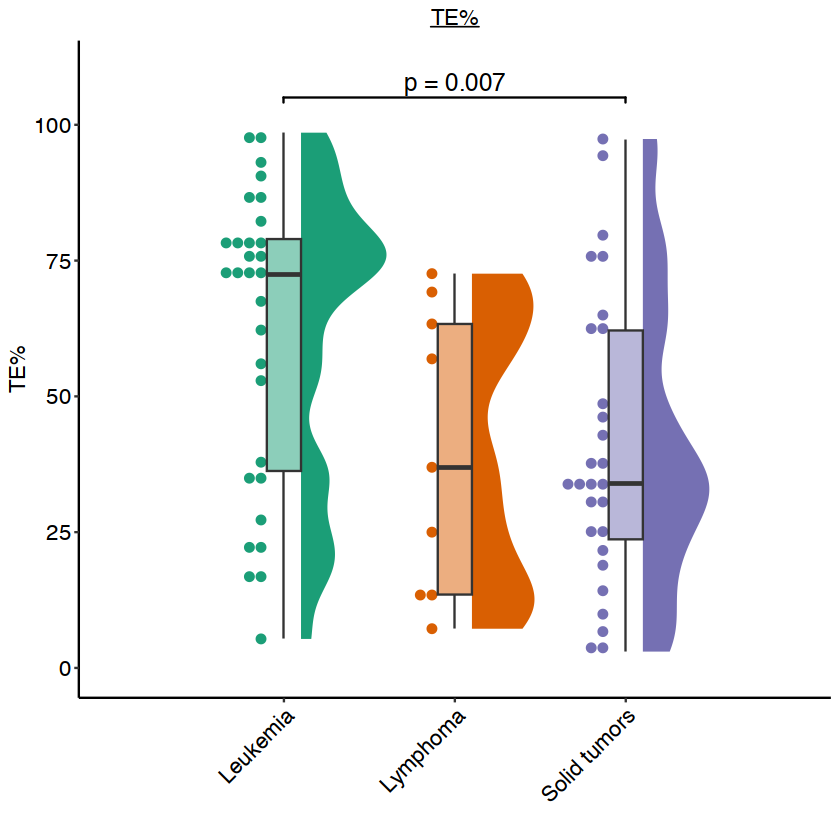

In [51]:
p2_stat

SCM

In [52]:
p_scm <- baseraincloud_plot.fx(pbmc_01, "`SCM%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = NA) 

In [53]:
# p_scm + scale_x_discrete(expand = c(0.5,0.5))

In [54]:
tapply(pbmc_01$`SCM%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.100   2.108   5.044   8.138  20.623 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.676   4.615   6.113  10.173  16.875 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.157   1.893   3.647   7.888   8.265  55.142 


In [55]:
mytest <- "SCM%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.1799617

[1] 0.6494338

[1] 0.3498404

In [56]:
# p0_stat <- p0 + geom_signif(
#     y_position = 100, xmin = 1, xmax = 3,
#     annotation = paste0("p = ",mypval), tip_length = 0.01, textsize = 5
#   ) + ggtitle(expression(underline("Naïve%") ))

In [57]:
p_scm <- p_scm + ggtitle(expression(underline("SCM%") ))

EM

In [58]:
p_em <- baseraincloud_plot.fx(pbmc_01, "`EM%`", "cancergroup", "cancergroup", group_col,
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = NA ) 

In [59]:
table(pbmc_01$cancergroup)


    Leukemia     Lymphoma Solid tumors 
          30            9           28 

In [60]:
tapply(pbmc_01$`EM%`, pbmc_01$cancergroup, summary)

$Leukemia
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00000  0.06145  0.28059  3.37643  2.14207 21.59827 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.5556  4.0570  6.9290  4.8780 33.1230 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1249  0.8432  4.2250  5.0442 29.2449 


In [61]:
mytest <- "EM%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.432542

[1] 0.2181431

[1] 0.06878161

In [62]:
mypval_em <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [63]:
mypval_em <- round_and_format(mypval_em)

In [64]:
mypval_em

[1] "0.4"

In [65]:
p_em <- p_em + ggtitle(expression(underline("EM%") ))


PD1

In [66]:
p3 <- baseraincloud_plot.fx(pbmc_01, "`PD1%`", "cancergroup", "cancergroup", group_col,
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 1, binwidth. = NA)  

In [67]:
tapply(pbmc_01$`PD1%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.6279  1.6827  4.2012  6.7877  8.8470 21.8750       2 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.444  17.924  28.842  28.321  29.909  75.000 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7637  5.1478  9.4226 11.6555 13.4189 47.6662 


In [68]:
table(pbmc_01$Disease_type)


   ALL    AML   ARMS     BL    CML  DLBCL   ERMS    EWS     HB     HD HR ALL 
    13      6      1      3      2      2      4      5      1      2      9 
 MS NB     NB     OS  PMBCL    RMS  WILMS 
     1      2      9      2      3      2 

In [69]:
pbmc_01[ pbmc_01$Disease_type == "OS", c("PD1%", "LAG3%","sample_id")]

,PD1%,LAG3%,sample_id
,<dbl>,<dbl>,<chr>
443,5.422222,1.600000,CHP_348_01
513,8.075532,16.512656,CHP_362_01
523,12.567399,5.060141,CHP_364_01
746,12.803738,10.046729,CHP_408_01
353,4.636849,2.749282,CHP_330_01
653,47.666254,37.050805,CHP_390_01
668,19.665072,7.416268,CHP_393_01
866,15.575304,4.069224,CHP_432_01
458,35.515955,3.149606,CHP_351_01


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


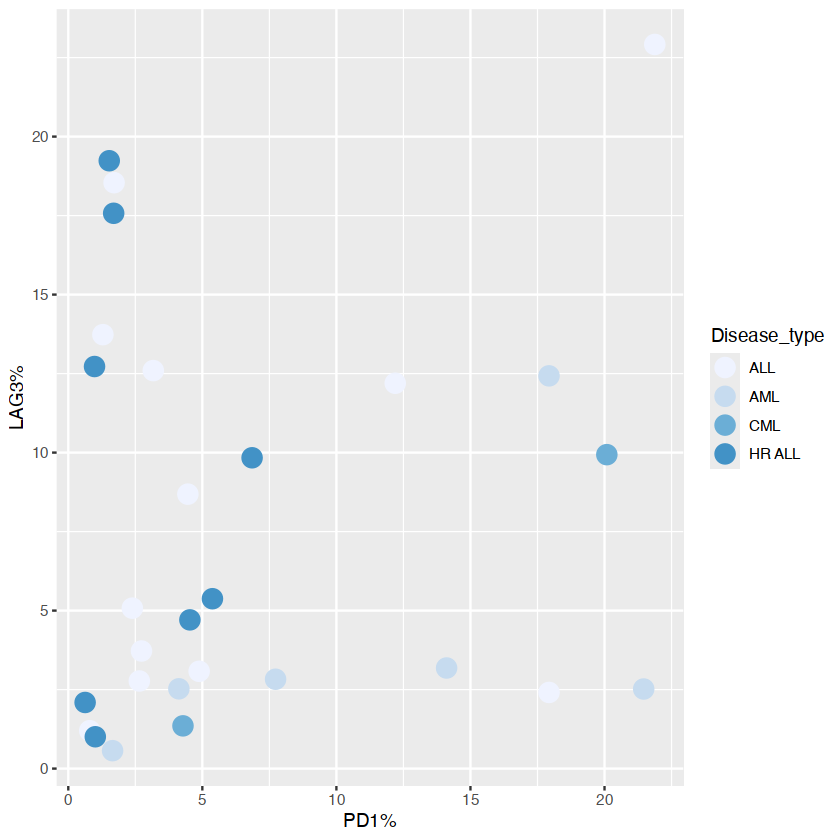

In [70]:
ggplot(pbmc_01[ pbmc_01$cancergroup == "Leukemia",], aes(x = `PD1%`, y = `LAG3%`, color = Disease_type)) + geom_point(size = 5) + scale_colour_manual(values = cohort_col)

In [71]:
tapply(pbmc_01$`PD1%`, pbmc_01$Disease_type, median, na.rm = T)

ALL       AML      ARMS        BL       CML     DLBCL      ERMS       EWS 
 2.950294 10.920486  5.049594 30.670611 12.182136 21.920910 10.365585  7.889302 
       HB        HD    HR ALL     MS NB        NB        OS     PMBCL       RMS 
 3.811659 24.520697  1.610322  3.632236  3.370986 12.803738 13.684160 12.599681 
    WILMS 
 3.198727

In [72]:
tapply(pbmc_01$`LAG3%`, pbmc_01$Disease_type, median, na.rm = T)

ALL        AML       ARMS         BL        CML      DLBCL       ERMS 
 6.8812994  2.6768312 10.9558161 25.0000000  5.6440194  8.4342296  8.1982947 
       EWS         HB         HD     HR ALL      MS NB         NB         OS 
 8.5321764  0.3736921 13.0491659  7.6062048  1.2485812  2.8512439  5.0601410 
     PMBCL        RMS      WILMS 
14.2156863  7.0227082  1.9231588

In [73]:
mytest <- "PD1%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.003824149

[1] 0.0002446874

[1] 0.01089048

In [74]:
mytest <- "PD1%"
mypval4 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval5 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval6 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [75]:
mypval4
mypval5
mypval6

[1] 0.003824149

[1] 0.0002446874

[1] 0.01089048

In [76]:
mypval4 <- round_and_format(mypval4)
mypval5 <- round_and_format(mypval5)
mypval6 <- round_and_format(mypval6)

In [77]:
p3_stat <- p3 + geom_signif(
    y_position = c(80, 90, 100), xmin = c(1,2,1), xmax = c(2,3,3),
    annotation = c(paste0("p = ",mypval5), paste0("p = ",mypval4), paste0("p = ",mypval6) ), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("PD1%") ))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”


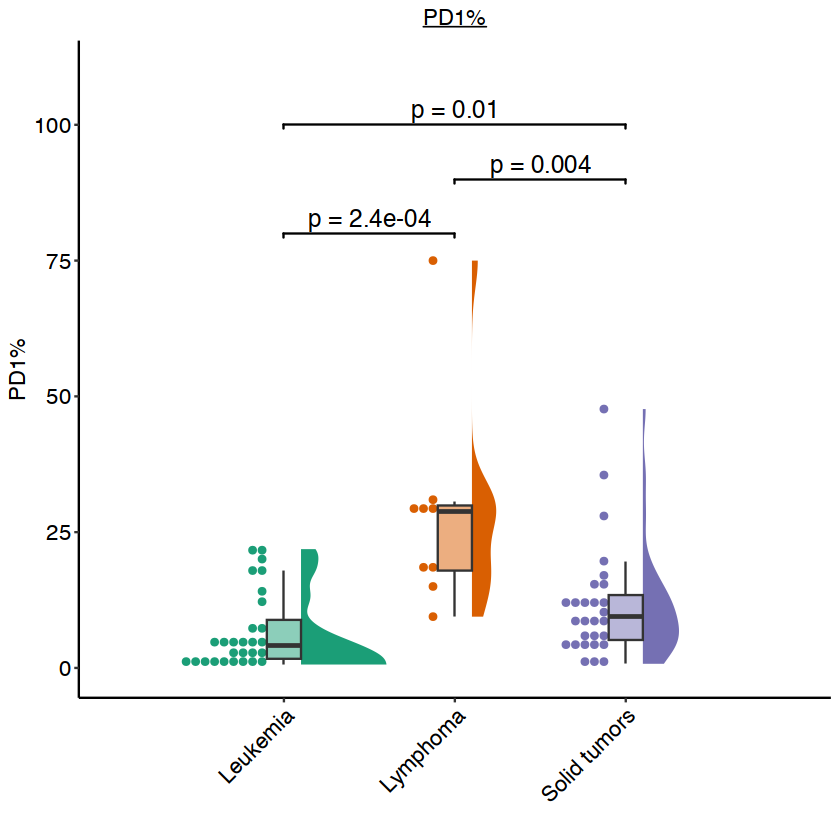

In [78]:
p3_stat

In [79]:
# pdf(paste0(plotpath, "rainclouds_PD1_X01.pdf"), width = 4, height = 6)
# p3_stat
# dev.off()

LAG3

In [80]:
p3_1 <- baseraincloud_plot.fx(pbmc_01, "`LAG3%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 1, binwidth. = NA) 

In [81]:
mytest <- "LAG3%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.009056199

[1] 0.033384

[1] 0.9440858

In [82]:
mytest <- "LAG3%"
mypval4_1 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval5_1 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

In [83]:
mypval4_1 <- round_and_format(mypval4_1)
mypval5_1 <- round_and_format(mypval5_1)

In [84]:
p3_stat_1 <- p3_1 + geom_signif(
    y_position = c(85, 100), xmin = c(1,2), xmax = c(2,3),
    annotation = c(paste0("p = ",mypval5_1), paste0("p = ",mypval4_1) ), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("LAG3%") ))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”


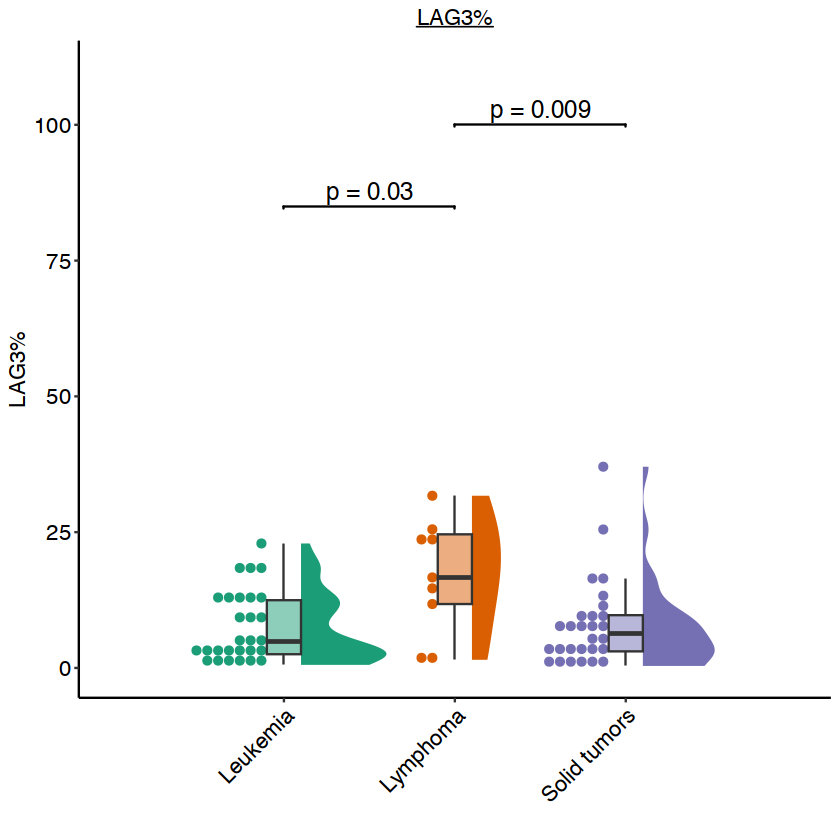

In [85]:
p3_stat_1

In [86]:
# pdf(paste0(plotpath, "rainclouds_LAG3_X01.pdf"), width = 4, height = 6)
# p3_stat_1
# dev.off()

TIM3

In [87]:
p3_2 <- baseraincloud_plot.fx(pbmc_01, "`TIM3%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 1, binwidth. = NA) 

In [88]:
mytest <- "TIM3%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.0009027658

[1] 0.001421002

[1] 0.02562465

In [89]:
mytest <- "TIM3%"
mypval4_2 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval5_2 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval6_2 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [90]:
mypval4_2 <- round_and_format(mypval4_2)
mypval5_2 <- round_and_format(mypval5_2)
mypval6_2 <- round_and_format(mypval6_2)

In [91]:
p3_stat_2 <- p3_2 + geom_signif(
    y_position = c(78, 88,105), xmin = c(1,2,1), xmax = c(2,3,3),
    annotation = c(paste0("p = ",mypval5_2), paste0("p = ",mypval4_2), paste0("p = ",mypval6_2) ), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("TIM3%") ))

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”


Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”


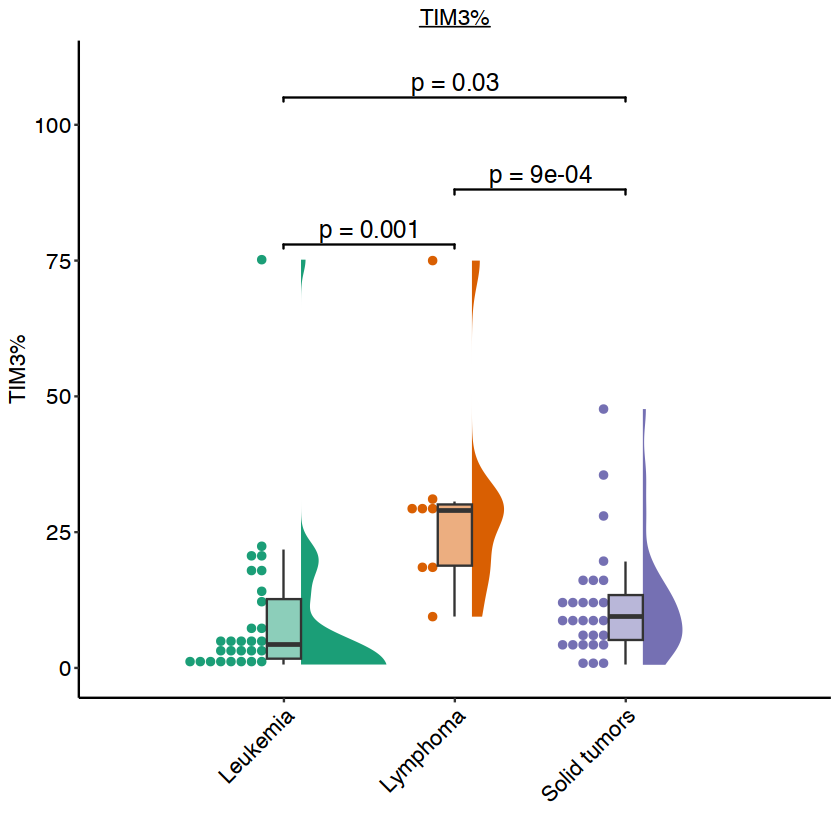

In [92]:
p3_stat_2

In [93]:
# pdf(paste0(plotpath, "rainclouds_TIM3_X01.pdf"), width = 4, height = 6)
# p3_stat_2
# dev.off()

TCR

In [94]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
pbmc_01 <- pbmc[pbmc$cycle == "X01",]
# pbmc_01 <- pbmc_01[ !is.na(pbmc_01$TRB),]

In [95]:
head(pbmc_01[pbmc_01$cancergroup == "Lymphoma",c("log10shann", "cancergroup", "observed_Shannon", "sample_id", "file", "TRB", "Reads")])

,log10shann,cancergroup,observed_Shannon,sample_id,file,TRB,Reads
,<dbl>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>
508,1.8842664,Lymphoma,76.606630,CHP_361_01,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-01-PBMC-DNA.txt,92,2711
558,2.6353007,Lymphoma,431.817972,CHP_371_01,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-01_PBMC-DNA.txt,674,34236
563,0.4352807,Lymphoma,2.724462,CHP_372_01,batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_372-01-PBMC-DNA.txt,3,335
741,2.4722089,Lymphoma,296.625795,CHP_407_01,batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_407-01_PBMC_DNA.txt,376,2065
633,NA,Lymphoma,NA,CHP_386_01,NA,NA,NA
706,NA,Lymphoma,NA,CHP_400_01,NA,NA,NA


In [96]:
p4 <- baseraincloud_plot.fx(pbmc_01, "log10shann", "cancergroup", "cancergroup", group_col, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = 0.07) 
#scaledots = 0.8, justdots= 1.1, scaleslab= 0.8, justslab= -0.1 , adjustslab= 0.5, binwidth. = 0.1)  

In [97]:
mytest <- "log10shann"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

[1] 0.5318245

[1] 0.7159797

[1] 0.8593407

In [98]:
mybreaks <- c(1, 10, 100, 500, 1000, 1500)
# mybreaks <- c(1, 10, 50, 100)

In [99]:
p4_1 <- p4 + annotation_logticks(sides = "l") +
    scale_y_continuous(breaks = log10(mybreaks), labels = mybreaks) + ggtitle(expression(underline("TCR diversity") )) +
labs(y = "TCR diversity (log10)")

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


Warning message:
“Removed 32 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”


Warning message:
“Removed 32 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 32 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”


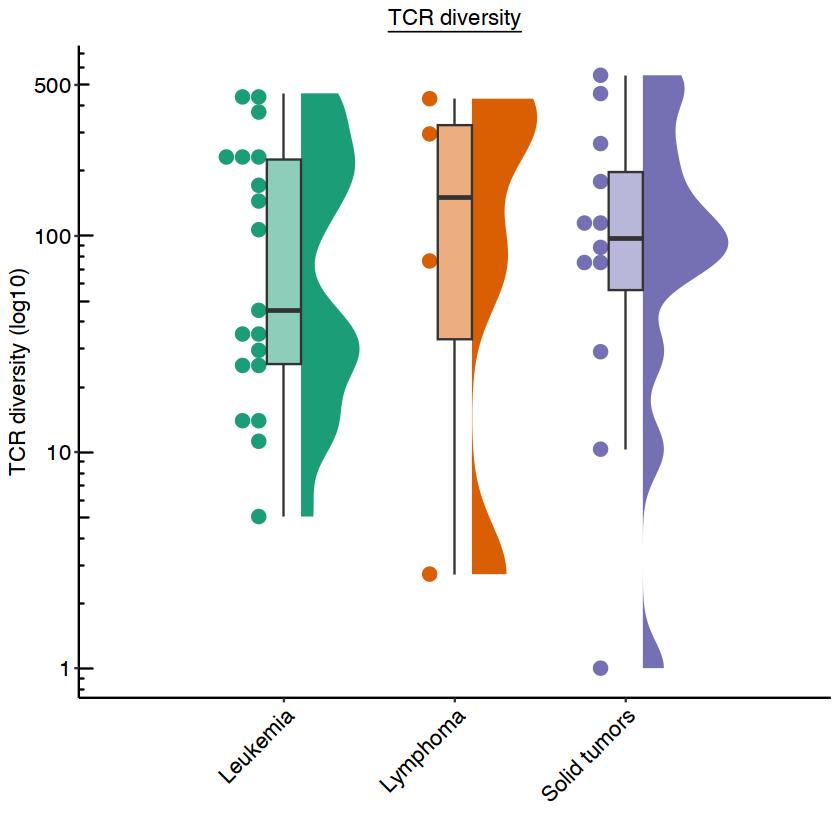

In [100]:
p4_1

In [101]:
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]
cfdna_01 <- cfdna[cfdna$cycle == "X01",]
cfdna_01 <- cfdna_01[ !is.na(cfdna_01$TRB),]

In [102]:
p5 <- baseraincloud_plot.fx(cfdna_01, "log10shann", "cancergroup", "cancergroup", group_col,
#scaledots = 0.7, justdots= 1.1, scaleslab= 0.7, justslab= -0.1 , adjustslab= 0.5, binwidth. = 0.04)  
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = 0.04) 

In [103]:
mytest <- "log10shann"
ks.test(cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Solid tumors")], cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Leukemia")])$p.value
ks.test(cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Solid tumors")], cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Lymphoma")])$p.value
ks.test(cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Leukemia")], cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Lymphoma")])$p.value

[1] 0.969988

[1] 0.394958

[1] 0.34952

In [104]:
# mybreaks <- c(1, 10, 100, 500, 1000, 1500)
mybreaks <- c(1, 10, 50, 100)

In [105]:
p5_1 <- p5 + annotation_logticks(sides = "l") +
    scale_y_continuous(breaks = log10(mybreaks), labels = mybreaks) + ggtitle(expression(underline("cfTCR diversity") )) + labs(y = "cfTCR diversity (log10)")

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


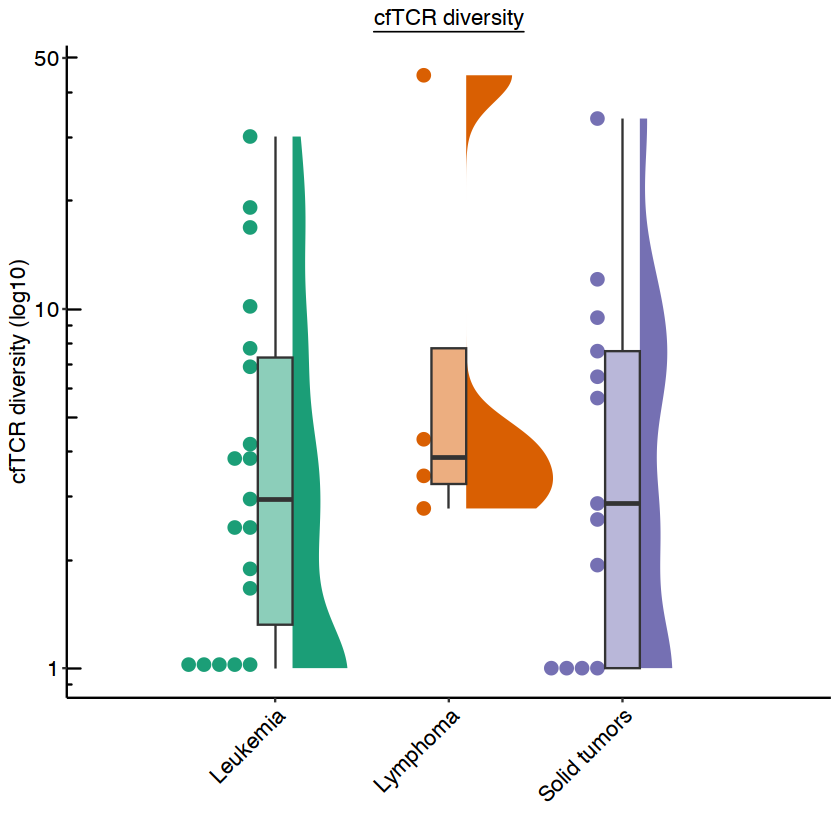

In [106]:
p5_1

Save plots

In [107]:
pdf(paste0(plotpath, "rainclouds_X01_checkpoints.pdf"), width = 12, height = 4)
plot_grid(p3_stat + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")), 
p3_stat_1 + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")), 
p3_stat_2 + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")), 
nrow = 1, align = "hv", axis = "lr", labels = c("A", "B", "C"))   
dev.off()

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning

pdf 
  2

In [108]:
pdf(paste0(plotpath, "rainclouds_X01_sigsubsets.pdf"), width = 12, height = 4)
plot_grid( 
p1_stat + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")), 
p0_stat+ theme(plot.margin = unit(c(0, 0, 0, 0), "cm")), 
p2_stat +  theme(plot.margin = unit(c(0, 0, 0, 0), "cm")), 
nrow = 1, align = "hv", axis = "lr", labels = c("F", "G", "H"))
dev.off()

Warning message:
“The provided binwidth will cause dots to overflow the boundaries of the
geometry.
→ Set `binwidth = NA` to automatically determine a binwidth that ensures dots
  fit within the bounds,
→ OR set `overflow = "compress"` to automatically reduce the spacing between
  dots to ensure the dots fit within the bounds,
→ OR set `overflow = "keep"` to allow dots to overflow the bounds of the
  geometry without producing a warning.
ℹ For more information, see the documentation of the `binwidth` and `overflow`
  arguments of `?ggdist::geom_dots()` or the section on constraining dot sizes
  in vignette("dotsinterval") (`vignette(ggdist::dotsinterval)`).”


pdf 
  2

In [109]:
pdf(paste0(plotpath, "rainclouds_X01_othersubsets.pdf"), width = 8, height = 8)
plot_grid(p_scm, p_em, p4_1, p5_1, nrow = 2,  align = "hv", axis = "lr", labels = c("A", "B", "C", "D"))
dev.off()

Warning message:
“Removed 32 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 32 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 32 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”


pdf 
  2

## S plots across cancer entities

In [106]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [107]:
table(meta_div$cancergroup,useNA = "always")


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                262                  94                 193                  30 
               <NA> 
                  0 

In [108]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
pbmc <- pbmc[ which(pbmc$CD3 > 0),] # this removes all SR ALL cases
pbmc_01 <- pbmc[pbmc$cycle == "X01",]

In [109]:
table(pbmc_01$Disease_type, useNA = "always")


  ALCL    ALL    AML   ARMS     BL    CML  DLBCL   ERMS    EWS     HB     HD 
     2     13      6      1      3      2      2      4      5      1      2 
HR ALL  MS NB     NB     OS  PMBCL    RMS  T-ALL  WILMS   <NA> 
     9      1      2      9      2      3      3      2      0 

PD1

In [110]:
table(pbmc_01$Disease_type,useNA = "always")


  ALCL    ALL    AML   ARMS     BL    CML  DLBCL   ERMS    EWS     HB     HD 
     2     13      6      1      3      2      2      4      5      1      2 
HR ALL  MS NB     NB     OS  PMBCL    RMS  T-ALL  WILMS   <NA> 
     9      1      2      9      2      3      3      2      0 

In [111]:
x01 <- pbmc_01

In [112]:
marker <- "PD1%"

In [113]:
x01 <- rbind(NA, NA, NA, x01)

x01[1, "Disease_type"] <- "EMPTY1"
x01[2, "Disease_type"] <- "EMPTY2"
x01[3, "Disease_type"] <- "EMPTY3"

x01[1, marker] <- -1
x01[2, marker] <- -1
x01[3, marker] <- -1

x01[1, "cancergroup"] <- "Lymphoma"
x01[2, "cancergroup"] <- "Solid tumors"
x01[3, "cancergroup"] <- "T-cell malignancies"

In [114]:
mymed <- median.cohorts.fx(x01, marker, "Disease_type")

# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- x01$cancergroup[match(mymed$group, x01$Disease_type)]

In [115]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [116]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
9,HR ALL,1.610322,Leukemia
5,ALL,2.950294,Leukemia
10,AML,10.920486,Leukemia
7,CML,12.182136,Leukemia
1,EMPTY1,-1.000000,Lymphoma
20,PMBCL,13.684160,Lymphoma
18,DLBCL,21.920910,Lymphoma
11,HD,24.520697,Lymphoma
15,BL,30.670611,Lymphoma


Sort df

In [117]:
sorted.df.lst <- sort.df.fx(x01, mymed, marker, "Disease_type")

Color dummy entries white

In [118]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [119]:
group_col

Leukemia            Lymphoma        Solid tumors T-cell malignancies 
          "#1B9E77"           "#D95F02"           "#7570B3"           "#2171b5" 
                LFS              Normal 
            "black"        "light grey"

In [120]:
Sp <- Splot.fx(sorted.df.lst, "`PD1%`", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


Warning message:
“The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in
ggplot2 3.3.4.
ℹ Please use "none" instead.”


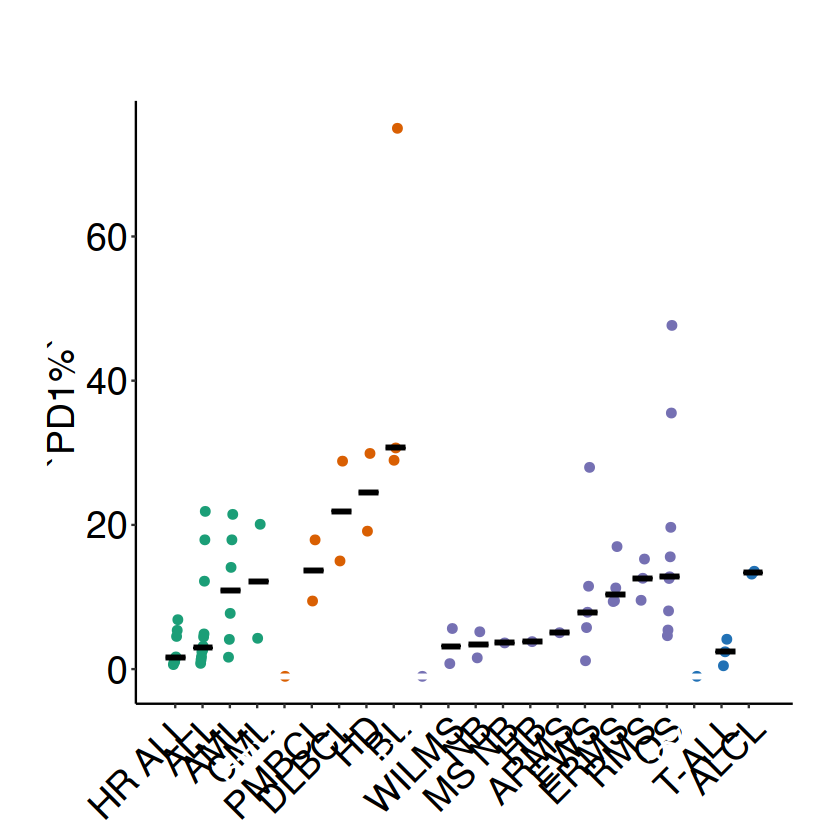

In [121]:
Sp

In [122]:
S_PD1 <- Sp + ylim(c(0, 100)) + labs(y = "PD1%") + ggtitle(expression(underline("PD1%") )) 

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


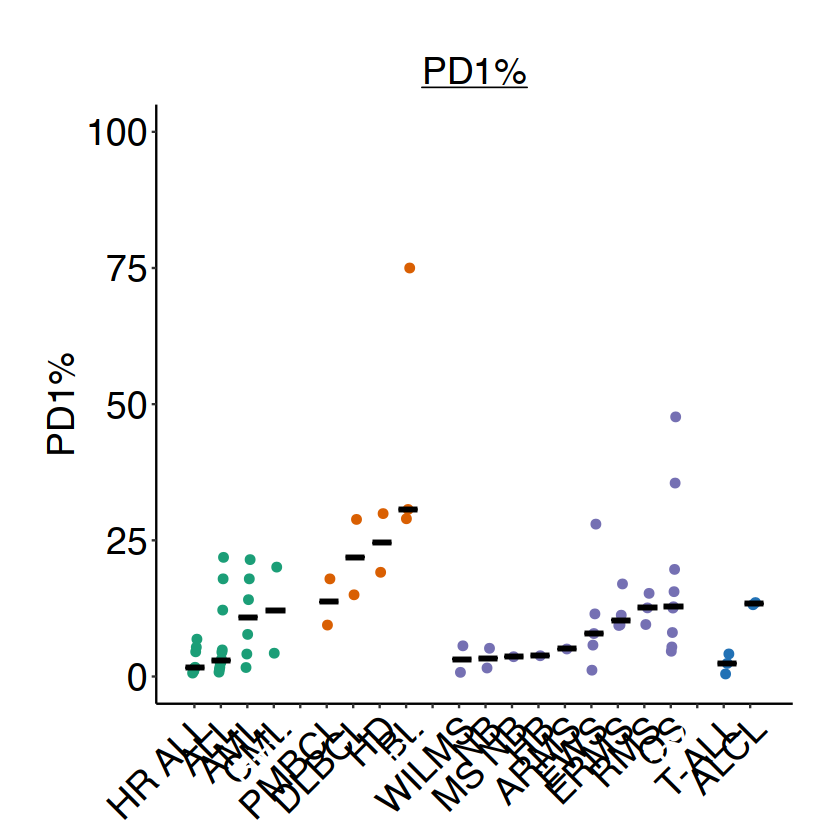

In [123]:
S_PD1

In [124]:
# pdf(paste0(plotpath, "Splot_PD1.pdf"), width = 10, height = 6)
# Sp + ylim(c(0, 100)) + labs(y = "PD1%")
# dev.off()

LAG3

In [125]:
x01 <- pbmc_01

In [126]:
marker <- "LAG3%"

In [127]:
x01 <- rbind(NA, NA, NA, x01)

x01[1, "Disease_type"] <- "EMPTY1"
x01[2, "Disease_type"] <- "EMPTY2"
x01[3, "Disease_type"] <- "EMPTY3"

x01[1, marker] <- -1
x01[2, marker] <- -1
x01[3, marker] <- -1

x01[1, "cancergroup"] <- "Lymphoma"
x01[2, "cancergroup"] <- "Solid tumors"
x01[3, "cancergroup"] <- "T-cell malignancies"

In [128]:
mymed <- median.cohorts.fx(x01, marker, "Disease_type")

# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- x01$cancergroup[match(mymed$group, x01$Disease_type)]

In [129]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [130]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
10,AML,2.6768312,Leukemia
7,CML,5.6440194,Leukemia
5,ALL,6.8812994,Leukemia
9,HR ALL,7.6062048,Leukemia
1,EMPTY1,-1.0000000,Lymphoma
18,DLBCL,8.4342296,Lymphoma
11,HD,13.0491659,Lymphoma
20,PMBCL,14.2156863,Lymphoma
15,BL,25.0000000,Lymphoma


Sort df

In [131]:
sorted.df.lst <- sort.df.fx(x01, mymed, marker, "Disease_type")

Color dummy entries white

In [132]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [133]:
Sp <- Splot.fx(sorted.df.lst, "`LAG3%`", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


In [134]:
S_LAG3 <- Sp + ylim(c(0, 100)) + labs(y = "LAG3%") + ggtitle(expression(underline("LAG3%") )) 

In [135]:
# pdf(paste0(plotpath, "Splot_LAG3.pdf"), width = 10, height = 6)
# Sp + ylim(c(0, 100)) + labs(y = "LAG3%")
# dev.off()

TIM3

In [136]:
x01 <- pbmc_01

In [137]:
marker <- "TIM3%"

In [138]:
x01 <- rbind(NA, NA, NA, x01)

x01[1, "Disease_type"] <- "EMPTY1"
x01[2, "Disease_type"] <- "EMPTY2"
x01[3, "Disease_type"] <- "EMPTY3"

x01[1, marker] <- -1
x01[2, marker] <- -1
x01[3, marker] <- -1

x01[1, "cancergroup"] <- "Lymphoma"
x01[2, "cancergroup"] <- "Solid tumors"
x01[3, "cancergroup"] <- "T-cell malignancies"

In [139]:
mymed <- median.cohorts.fx(x01, marker, "Disease_type")

# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- x01$cancergroup[match(mymed$group, x01$Disease_type)]

In [140]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [141]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
9,HR ALL,1.610322,Leukemia
5,ALL,2.950294,Leukemia
7,CML,12.182136,Leukemia
10,AML,16.019948,Leukemia
1,EMPTY1,-1.000000,Lymphoma
20,PMBCL,13.684160,Lymphoma
11,HD,24.520697,Lymphoma
18,DLBCL,28.841821,Lymphoma
15,BL,30.670611,Lymphoma


Sort df

In [142]:
sorted.df.lst <- sort.df.fx(x01, mymed, marker, "Disease_type")

Color dummy entries white

In [143]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [144]:
Sp <- Splot.fx(sorted.df.lst, "`TIM3%`", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


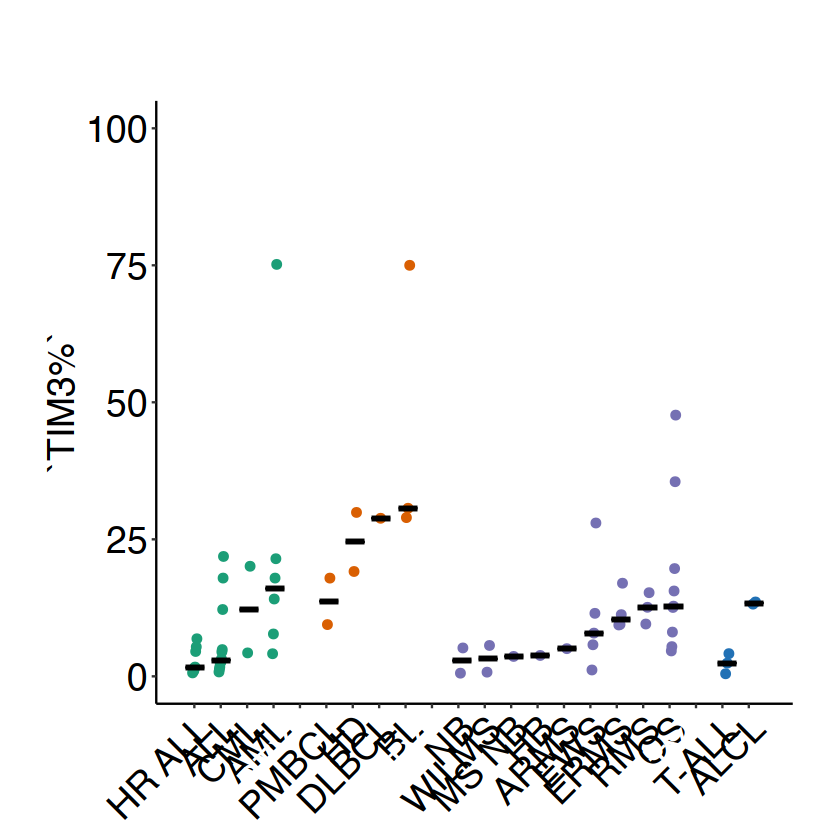

In [145]:
Sp + ylim(c(0, 100))

In [330]:
# pdf(paste0(plotpath, "Splot_TIM3.pdf"), width = 10, height = 6)
# Sp + ylim(c(0, 100)) + labs(y = "TIM3%")
# dev.off()

CM%

In [146]:
x01 <- pbmc_01

In [147]:
marker <- "CM%"

In [148]:
x01 <- rbind(NA, NA, NA, x01)

x01[1, "Disease_type"] <- "EMPTY1"
x01[2, "Disease_type"] <- "EMPTY2"
x01[3, "Disease_type"] <- "EMPTY3"

x01[1, marker] <- -1
x01[2, marker] <- -1
x01[3, marker] <- -1

x01[1, "cancergroup"] <- "Lymphoma"
x01[2, "cancergroup"] <- "Solid tumors"
x01[3, "cancergroup"] <- "T-cell malignancies"

In [149]:
mymed <- median.cohorts.fx(x01, marker, "Disease_type")

# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- x01$cancergroup[match(mymed$group, x01$Disease_type)]

In [150]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [151]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
9,HR ALL,1.3458401,Leukemia
5,ALL,2.1884770,Leukemia
10,AML,2.2666165,Leukemia
7,CML,16.2705272,Leukemia
1,EMPTY1,-1.0000000,Lymphoma
20,PMBCL,8.8994617,Lymphoma
18,DLBCL,10.1581043,Lymphoma
11,HD,23.5831773,Lymphoma
15,BL,32.3471400,Lymphoma


Sort df

In [152]:
sorted.df.lst <- sort.df.fx(x01, mymed, marker, "Disease_type")

Color dummy entries white

In [153]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [154]:
Sp <- Splot.fx(sorted.df.lst, "`CM%`", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


In [155]:
S_CM <- Sp + ylim(c(0, 100)) + labs(y = "CM%") + ggtitle(expression(underline("CM%") )) 

Naïve

In [156]:
x01 <- pbmc_01

In [157]:
marker <- "Naïve%"

In [158]:
x01 <- rbind(NA, NA, NA, x01)

x01[1, "Disease_type"] <- "EMPTY1"
x01[2, "Disease_type"] <- "EMPTY2"
x01[3, "Disease_type"] <- "EMPTY3"

x01[1, marker] <- -1
x01[2, marker] <- -1
x01[3, marker] <- -1

x01[1, "cancergroup"] <- "Lymphoma"
x01[2, "cancergroup"] <- "Solid tumors"
x01[3, "cancergroup"] <- "T-cell malignancies"

In [159]:
mymed <- median.cohorts.fx(x01, marker, "Disease_type")

# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- x01$cancergroup[match(mymed$group, x01$Disease_type)]

In [160]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [161]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
10,AML,5.149957,Leukemia
7,CML,8.664382,Leukemia
9,HR ALL,14.307004,Leukemia
5,ALL,29.032258,Leukemia
1,EMPTY1,-1.000000,Lymphoma
11,HD,16.400775,Lymphoma
20,PMBCL,17.772011,Lymphoma
15,BL,25.000000,Lymphoma
18,DLBCL,53.494943,Lymphoma


Sort df

In [162]:
sorted.df.lst <- sort.df.fx(x01, mymed, marker, "Disease_type")

Color dummy entries white

In [163]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [164]:
Sp <- Splot.fx(sorted.df.lst, "`Naïve%`", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


In [165]:
S_naive <- Sp + ylim(c(0, 100)) + labs(y = "Naïve%") + ggtitle(expression(underline("Naïve%") )) 

TE

In [166]:
x01 <- pbmc_01

In [167]:
marker <- "TE%"

In [168]:
x01 <- rbind(NA, NA, NA, x01)

x01[1, "Disease_type"] <- "EMPTY1"
x01[2, "Disease_type"] <- "EMPTY2"
x01[3, "Disease_type"] <- "EMPTY3"

x01[1, marker] <- -1
x01[2, marker] <- -1
x01[3, marker] <- -1

x01[1, "cancergroup"] <- "Lymphoma"
x01[2, "cancergroup"] <- "Solid tumors"
x01[3, "cancergroup"] <- "T-cell malignancies"

In [169]:
mymed <- median.cohorts.fx(x01, marker, "Disease_type")

# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- x01$cancergroup[match(mymed$group, x01$Disease_type)]

In [170]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [171]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
7,CML,49.180174,Leukemia
5,ALL,67.493797,Leukemia
9,HR ALL,76.111111,Leukemia
10,AML,77.311831,Leukemia
1,EMPTY1,-1.000000,Lymphoma
18,DLBCL,10.280782,Lymphoma
15,BL,25.000000,Lymphoma
11,HD,46.925708,Lymphoma
20,PMBCL,67.964245,Lymphoma


Sort df

In [172]:
sorted.df.lst <- sort.df.fx(x01, mymed, marker, "Disease_type")

Color dummy entries white

In [173]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [174]:
Sp <- Splot.fx(sorted.df.lst, "`TE%`", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


In [175]:
S_TE <- Sp + ylim(c(0, 100)) + labs(y = "TE%") + ggtitle(expression(underline("TE%") )) 

Save plots

In [176]:
pdf(paste0(plotpath, "Splot_PD1_LAG3.pdf"), width = 12, height = 4)
plot_grid(S_PD1 + theme(axis.text = element_text(size = 13), axis.title = element_text(size = 13), plot.title = element_text(size = 13), plot.margin = unit(c(0, 0, 0, 0), "cm")), 
S_LAG3 + theme(axis.text = element_text(size = 13), axis.title = element_text(size = 13), plot.title = element_text(size = 13), plot.margin = unit(c(0, 0, 0, 0), "cm")), 
nrow = 1,  align = "hv", axis = "lr", labels = c("D", "E"))
dev.off()

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


pdf 
  2

In [177]:
pdf(paste0(plotpath, "Splot_TE_CM.pdf"), width = 12, height = 4)
plot_grid(S_CM + theme(axis.text = element_text(size = 13), axis.title = element_text(size = 13), plot.title = element_text(size = 13), plot.margin = unit(c(0, 0, 0, 0), "cm")), 
S_TE + theme(axis.text = element_text(size = 13), axis.title = element_text(size = 13), plot.title = element_text(size = 13), plot.margin = unit(c(0, 0, 0, 0), "cm")), 
nrow = 1,  align = "hv", axis = "lr", labels = c("I", "J"))
dev.off()

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


pdf 
  2

In [178]:
pdf(paste0(plotpath, "Splot_CM.pdf"), width = 6, height = 4)
plot_grid(S_CM + theme(axis.text = element_text(size = 13), axis.title = element_text(size = 13), plot.title = element_text(size = 13), plot.margin = unit(c(0, 0, 0, 0), "cm")), 
# S_TE + theme(axis.text = element_text(size = 13), axis.title = element_text(size = 13), plot.title = element_text(size = 13), plot.margin = unit(c(0, 0, 0, 0), "cm")), 
 labels = "I")
dev.off()

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


pdf 
  2